In [74]:
# returns and risks of portfolios 
import numpy as np
import math
import matplotlib.pyplot as plt
import pylab as pl

In [57]:
def cal_mean(frac):
    return(0.08*frac+0.15*(1-frac))

In [58]:
mean=list(map(cal_mean,[x/50 for x in range(51)]))
sd_mat=np.array([list(map(lambda x: math.sqrt((x**2)*0.12**2+((1-x)**2)*0.25**2+2*x*(1-x)*(-1.5+i*0.5)*0.12*0.25),[x/50 for x in range(51)])) for i in range (1,6)])

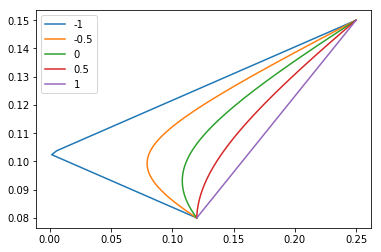

In [59]:
plt.plot(sd_mat[0,:],mean,label='-1')
plt.plot(sd_mat[1,:],mean,label='-0.5')
plt.plot(sd_mat[2,:],mean,label='0')
plt.plot(sd_mat[3,:],mean,label='0.5')
plt.plot(sd_mat[4,:],mean,label='1')
plt.legend(loc='upper left')

In [60]:
# Markowitz Mean-Variance Model
import pandas as pd 
stock=pd.read_table('stock.txt',sep='\t',index_col='Trddt')
fjgs=stock.ix[stock.Stkcd==600033,'Dretwd']
fjgs.name='fjgs'
zndl=stock.ix[stock.Stkcd==600023,'Dretwd']
zndl.name='zndl'
sykj=stock.ix[stock.Stkcd==600183,'Dretwd']
sykj.name='sykj'
hxyh=stock.ix[stock.Stkcd==600015,'Dretwd']
hxyh.name='hxyh'
byjc=stock.ix[stock.Stkcd==600004,'Dretwd']
byjc.name='byjc'
sh_return=pd.concat([byjc,fjgs,hxyh,sykj,zndl],axis=1)
sh_return.index = pd.to_datetime(sh_return.index)
# this date transfer is important for later operations
sh_return.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning:

,byjc,fjgs,hxyh,sykj,zndl
Trddt,,,,,
2014-01-02,-0.001439,0.000000,-0.031505,0.002024,0.008876
2014-01-03,-0.008646,0.004673,-0.028916,-0.012121,-0.013196
2014-01-06,-0.018895,-0.023256,-0.023573,-0.026585,0.005944
2014-01-07,-0.007407,0.004762,-0.003812,0.021008,-0.013294
2014-01-08,0.005970,-0.014218,0.021684,-0.014403,0.008982


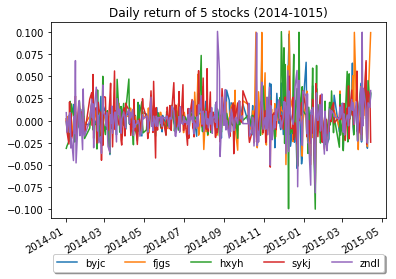

In [61]:
# check accumulated returns of these stocks
sh_return=sh_return.dropna()
cumreturn=(1+sh_return).cumprod()
sh_return.plot()
plt.title('Daily return of 5 stocks (2014-1015)')
plt.legend(loc='lower center',bbox_to_anchor=(0.5,-0.3),ncol=5,fancybox=True,shadow=True)

Text(0.5,1,'Cumulative return of 5 stocks (2014-2015)')

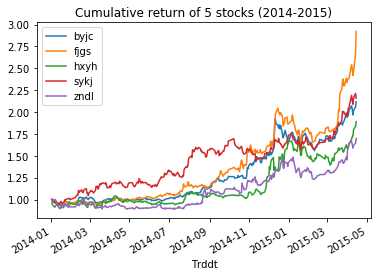

In [62]:
cumreturn.plot()
plt.title('Cumulative return of 5 stocks (2014-2015)')

In [63]:
# check correlated relations among these stocks
sh_return.corr()
# which shows they are all positively correlated, 0.59 is the highest correlation coefficient 

,byjc,fjgs,hxyh,sykj,zndl
byjc,1.000000,0.591674,0.327680,0.372088,0.429905
fjgs,0.591674,1.000000,0.282111,0.361442,0.397685
hxyh,0.327680,0.282111,1.000000,0.207656,0.369259
sykj,0.372088,0.361442,0.207656,1.000000,0.302859
zndl,0.429905,0.397685,0.369259,0.302859,1.000000


In [64]:
# define mean-var class
from scipy import linalg
class MeanVariance:
    # define constructor to import return values
    def __init__(self,returns):
        self.returns=returns
    # define a function that minimizes the var, quadratic programming
    def minVar(self,goalRet):
        covs=np.array(self.returns.cov())
        means=np.array(self.returns.mean())
        L1=np.append(np.append(covs.swapaxes(0,1),[means],0),[np.ones(len(means))],0).swapaxes(0,1) # like transpose
        L2=list(np.ones(len(means)))
        L2.extend([0,0])
        L3=list(means)
        L3.extend([0,0])
        L4=np.array([L2,L3])
        L=np.append(L1,L4,0)
        results=linalg.solve(L,np.append(np.zeros(len(means)),[1,goalRet],0))
        return(np.array([list(self.returns.columns),results[:-2]]))
    # define a function that plots min var frontier
    def frontierCurve(self):
        goals=[x/500000 for x in range(-100,4000)]
        variances=list(map(lambda x: self.calVar(self.minVar(x)[1,:].astype(np.float)),goals))
        plt.plot(variances,goals)
    # given proportions, compute total return (mean)
    def meanRet(self,fracs):
        meanRisky=ffn.to_returns(self.returns).mean()
        assert len(meanRisky)==len(fracs), 'Length of fractions must be equal to number of assets'
        return(np.sum(np.multiply(meanRisky,np.array(fracs))))
    # given proportions, compute total var
    def calVar(self,fracs):
        return(np.dot(np.dot(fracs,self.returns.cov()),fracs))        

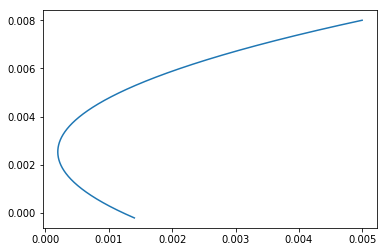

In [65]:
# plot the efficient frontier by 5 stocks
minVar=MeanVariance(sh_return)
minVar.frontierCurve()

In [67]:
# assume our expected return (daily) is 0.003, split the dataset into train and test set
# use test set to check if the strategy derived by mean-variance model is superior
train_set=sh_return['2014']
test_set=sh_return['2015']
# choose portfolios
varMinimizer=MeanVariance(train_set)
goal_return=0.003
portfolio_weight=varMinimizer.minVar(goal_return)
portfolio_weight

array([['byjc', 'fjgs', 'hxyh', 'sykj', 'zndl'],
       ['-0.10970733137288036', '0.8121632841002371', '0.3474730536307217',
        '0.4301821962925995', '-0.480111202650678']],
      dtype='<U32')

(array([ 735599.,  735613.,  735627.,  735641.,  735655.,  735669.,
         735683.,  735697.]), <a list of 8 Text xticklabel objects>)

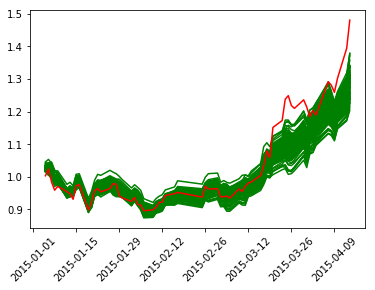

In [75]:
# test
test_return=np.dot(test_set,np.array([portfolio_weight[1,:].astype(np.float)]).swapaxes(0,1))
test_return=pd.DataFrame(test_return,index=test_set.index)
test_cum_return=(1+test_return).cumprod()
# compare with random strategy
sim_weight=np.random.uniform(0,1,(100,5))
sim_weight=np.apply_along_axis(lambda x: x/sum(x),1,sim_weight)
sim_return=np.dot(test_set,sim_weight.swapaxes(0,1))
sim_return=pd.DataFrame(sim_return,index=test_cum_return.index)
sim_cum_return=(1+sim_return).cumprod()
plt.plot(sim_cum_return.index,sim_cum_return,color='green')
plt.plot(test_cum_return.index,test_cum_return,color='red')
pl.xticks(rotation=45)

In [79]:
# Black-Litterman Model
# add investor's views and use Bayes's principle
def blacklitterman(returns,tau,P,Q):
    mu=returns.mean()
    sigma=returns.cov()
    pi1=mu
    ts=tau*sigma
    Omega=np.dot(np.dot(P,ts),P.T)*np.eye(Q.shape[0])
    middle=linalg.inv(np.dot(np.dot(P,ts),P.T)+Omega)
    er=np.expand_dims(pi1,axis=0).T+np.dot(np.dot(np.dot(ts,P.T),middle),(Q-np.expand_dims(np.dot(P,pi1.T),axis=1)))
    posteriorSigma=sigma+ts-np.dot(ts.dot(P.T).dot(middle).dot(P),ts)
    return(er,posteriorSigma)

In [80]:
# personal viewpoint
# assume 1. the first 4 stocks 0.3% daily, 2. 2 transport stocks are higher than electricity
pick1=np.array([1,0,1,1,1])
q1=np.array([0.003*4])
pick2=np.array([0.5,0.5,0,0,-1])
q2=np.array([0.001])
P=np.array([pick1,pick2])
Q=np.array([q1,q2])
[P,Q]

[array([[ 1. ,  0. ,  1. ,  1. ,  1. ],
        [ 0.5,  0.5,  0. ,  0. , -1. ]]), array([[ 0.012],
        [ 0.001]])]

In [81]:
# get modify posterior return
res=blacklitterman(sh_return,0.1,P,Q)
p_mean=pd.DataFrame(res[0],index=sh_return.columns,columns=['posterior_mean'])
p_mean

,posterior_mean
byjc,0.002857
fjgs,0.003931
hxyh,0.002629
sykj,0.002921
zndl,0.002337


In [82]:
# get modify posterior cov
p_cov=res[1]
p_cov

,byjc,fjgs,hxyh,sykj,zndl
byjc,0.000353,0.000246,0.000134,0.000132,0.000180
fjgs,0.000246,0.000506,0.000138,0.000155,0.000201
hxyh,0.000134,0.000138,0.000515,0.000085,0.000179
sykj,0.000132,0.000155,0.000085,0.000385,0.000127
zndl,0.000180,0.000201,0.000179,0.000127,0.000494


In [83]:
# use updated information into Markowitz model
# blres comes from the results of BL function
def blminVar(blres,goalRet):
    covs=np.array(blres[1])
    means=np.array(blres[0])
    L1=np.append(np.append(covs.swapaxes(0,1),[means.flatten()],0),[np.ones(len(means))],0).swapaxes(0,1) # like transpose
    L2=list(np.ones(len(means)))
    L2.extend([0,0])
    L3=list(means)
    L3.extend([0,0])
    L4=np.array([L2,L3])
    L=np.append(L1,L4,0)
    results=linalg.solve(L,np.append(np.zeros(len(means)),[1,goalRet],0))
    return(pd.DataFrame(results[:-2],index=blres[1].columns,columns=['p_weight']))

In [84]:
blminVar(res,0.75/252)

,p_weight
byjc,0.226360
fjgs,0.172357
hxyh,0.201557
sykj,0.321434
zndl,0.078292
